# Лабораторная работа 8

# Обход бинарного дерева поиска. Поиск максимального и минимального значенй

Билина Вероника, 17.05.2025

In [2]:
class BinaryTree: 
    """Бинарное дерево поиска будет представлено экземпляром класса BinaryTree.
    Экземпляр класса BinaryTree будет содержать ссылку на корень дерева. Корень
    дерева будет представлен экземпляром класса EmptyNode , если дерево пустое, или
    экземпляром класса BinaryNode , если дерево не пусто."""
    def __init__(self): # Конструктор инициализирует пустое бинарное дерево, устанавливая его корневой узел как EmptyNode (пустой узел).
        self.root=EmptyNode()
        BinaryNode.numberOfNodes=0
    def __repr__(self): # Возвращает строковое представление дерева, вызывая метод __repr__() у корневого узла.
        return repr(self.root)
    def insert(self,value): # Метод вставки в дерево нового элемента
        self.root=self.root.insert(value)
    def __contains__(self,value):
        return value in self.root
    def __len__(self):
        return len(self.root)
    def lcr(self):
        return self.root.lcr()
class EmptyNode: 
    """Определяет шаблон для создания объекта, представляющего
"пустой" элемент (вершину) бинарного дерева поиска без значения и без
поддеревьев. Экземпляры класса EmptyNode будут использоваться для
представления пустого дерева и пустых поддеревьев."""
    def __repr__(self): # Метод строкового представления экземпляра класса __repr__ возвращает один символ *
        return '*'
    def insert(self, value):
        return BinaryNode(self, value, self) # Метод insert(value) является методом вставки в пустую вершину НОВОЙ вершины со значением value . Метод insert возвращает новый экземпляр класса BinaryNode со значением value . Левое и правое поддерево определяются ссылками на пустую вершину
    def __contains__(self,value):
        return False
    def __len__(self):
        return 0
    def lcr(self):
        return []
class BinaryNode:
    """Класс BinaryNode определяет шаблон для создания объекта, представляющего
элемент бинарного дерева поиска"""
    numberOfNodes=0
    def __init__(self,left,value,right): # Инициализация экземпляра класса и одноименных атрибутов экземпляра класса left, value,right(хранение ссылки на корень левого и правого поддерева и значения вершины
        self.left=left
        self.value=value
        self.right=right
        BinaryNode.numberOfNodes+=1
    def __repr__(self): # Метод строкового представления экземпляра класса __repr__ возвращает кортеж, состоящий из строкового представления корня левого поддерева left , из строкового представления значения value вершины и из строкового представления корня правого поддерева right
        return f'({self.left},{self.value},{self.right})'
    def insert(self,value): # Добавление нового элемента дерева
        if value<self.value:
            self.left=self.left.insert(value)
        if value>=self.value:
            self.right=self.right.insert(value)
        return self
    def __contains__(self,value):
        if value==self.value:
            return True
        elif value<self.value:
            return value in self.left
        else: 
            return value in self.right
    def __len__(self):
        return self.numberOfNodes
    def lcr(self):
        result = []
        if self.left:
            result += self.left.lcr()
        result.append(self.value)
        if self.right:
            result += self.right.lcr()
        return result

In [4]:
import matplotlib.pyplot as plt
import random as rnd

In [5]:
source_data = list(rnd.uniform(0,100) for _ in range(10**3))

In [6]:
tree = BinaryTree()
for i in source_data:
    tree.insert(i)

In [7]:
sorted_data = tree.lcr()

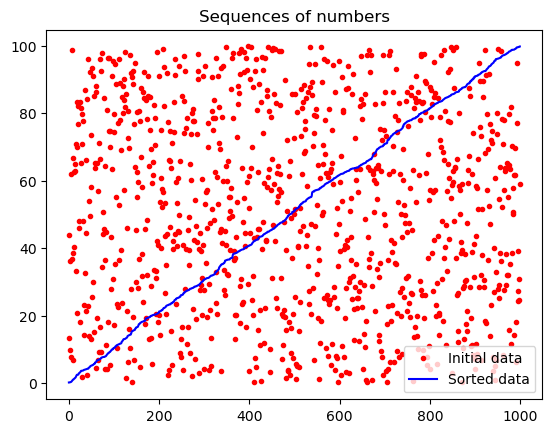

In [12]:
plt.plot(source_data,'r.', label='Initial data')
plt.plot(sorted_data,color='blue',label='Sorted data')
plt.title('Sequences of numbers')
plt.legend()

## Задание 8.2. Нахождение минимального и максимального значения

In [15]:
class BinaryTree:
    def __init__(self):
        self.root = EmptyNode()
        BinaryNode.numberOfNodes = 0
    def __repr__(self):
        return repr(self.root)
    def insert(self, value):
        self.root = self.root.insert(value)
    def __contains__(self, value):
        return value in self.root
    def __len__(self):
        return len(self.root)
    def lcr(self):
        return self.root.lcr()
    def min(self):
        return self.root.min()
    def max(self):
        return self.root.max()


In [17]:
class BinaryNode:
    def __init__(self, left, value, right):
        self.left = left
        self.value = value
        self.right = right
        BinaryNode.numberOfNodes += 1 
    def __repr__(self):
        return f'({self.left}, {self.value}, {self.right})'

    def insert(self, value):
         if value<self.value:
             self.left =self.left.insert(value)
         else:
             self.right =self.right.insert(value)
         return self
    def __contains__(self, value):
        if value==self.value:
            return True
        if value<self.value:
            return value in self.left
        if value>self.value:
            return value in self.right 
    def __len__(self):
        return self.numberOfNodes
    def lcr(self):
        result = self.left.lcr()        
        result += [self.value]         
        result += self.right.lcr()      
        return result
    def min(self):
        if isinstance(self.left, EmptyNode):
            return self.value
        else:
            return self.left.min() 
    def max(self):
        if isinstance(self.right, EmptyNode):
            return self.value
        else:
            return self.right.max()


In [19]:
class EmptyNode:
    def __repr__(self):
        return '*'
    def insert(self, value):
        return BinaryNode(self, value, self)
    def __contains__(self, value):
        return False
    def __len__(self):
        return 0
    def lcr(self):
        return []
    def min(self):
        return None
    def max(self):
        return None

In [21]:
tree = BinaryTree()
for i in source_data:
    tree.insert(i)
tree.min()

0.24291871069975768

In [23]:
sorted_data[0]

0.24291871069975768

In [25]:
tree.max()

99.79758611159711

In [27]:
sorted_data[999]

99.79758611159711

## Задание 8.3. Создание модуля

In [44]:
from binaryTree import BinaryTree
tree = BinaryTree()
for i in [5, 1, 6, 3, 4, 8, 9, 7, 2]:
    tree.insert(i)
print("Дерево:", tree)
print("Центрированный обход (сортировка):", tree.lcr())
print("Минимум:", tree.min())
print("Максимум:", tree.max())
print("Содержит 11?", 11 in tree)
print("Содержит 1?", 1 in tree)
print("Количество узлов:", len(tree))

Дерево: ((*, 1, ((*, 2, *), 3, (*, 4, *))), 5, (*, 6, ((*, 7, *), 8, (*, 9, *))))
Центрированный обход (сортировка): [1, 2, 3, 4, 5, 6, 7, 8, 9]
Минимум: 1
Максимум: 9
Содержит 11? False
Содержит 1? True
Количество узлов: 9


## Задание 8.4. Примеры пользовательских классов

In [51]:
class BankAccount:
    """Банковский счёт с проверкой баланса"""
    def __init__(self, owner, balance=0):
        self.owner = owner
        self._balance = balance
    @property
    def balance(self):
        """Геттер для баланса"""
        return self._balance
    @balance.setter
    def balance(self, amount):
        """Сеттер для баланса (не позволяет установить отрицательное значение)"""
        if amount >= 0:
            self._balance = amount
        else:
            raise ValueError("Баланс не может быть отрицательным!")
    def deposit(self, amount):
        """Метод для внесения средств"""
        self.balance += amount
    def withdraw(self, amount):
        """Метод для снятия средств"""
        if amount <= self.balance:
            self.balance -= amount
        else:
            raise ValueError("Недостаточно средств!")
    def __repr__(self):
        return f"BankAccount(owner={self.owner}, balance={self.balance})"
account = BankAccount("Alice", 100)
print(account.balance) 
account.deposit(50)
print(account.balance)  
account.withdraw(30)
print(account.balance) 

100
150
120


In [54]:
class MathUtils:
    """Статические методы для математических операций"""
    @staticmethod
    def add(a, b):
        return a + b
    @staticmethod
    def multiply(a, b):
        return a * b
    @staticmethod
    def factorial(n):
        if n == 0:
            return 1
        return n * MathUtils.factorial(n - 1)
print(MathUtils.add(3, 5)) 
print(MathUtils.multiply(4, 7))
print(MathUtils.factorial(5))  

8
28
120


In [57]:
class Employee:
    """Класс для управления сотрудниками"""
    company_name = "TechCorp"
    employee_count = 0 
    def __init__(self, name, position, salary):
        self.name = name
        self.position = position
        self.salary = salary
        Employee.employee_count += 1
    @classmethod
    def set_company_name(cls, name):
        """Изменение названия компании"""
        cls.company_name = name
    @classmethod
    def get_employee_count(cls):
        """Получение количества сотрудников"""
        return cls.employee_count
    @staticmethod
    def is_working_day(day):
        """Проверка, является ли день рабочим"""
        return day.lower() not in ["суббота", "воскресенье"]
    def __repr__(self):
        return f"{self.name} ({self.position}) - {self.salary} USD"
emp1 = Employee("Alice", "Developer", 6000)
emp2 = Employee("Bob", "Manager", 7500)
print(emp1)  
print(Employee.get_employee_count())  
Employee.set_company_name("InnovateTech")
print(Employee.company_name) 
print(Employee.is_working_day("понедельник"))
print(Employee.is_working_day("воскресенье"))

Alice (Developer) - 6000 USD
2
InnovateTech
True
False
